## 1. Internal compare

In [8]:
import os
import glob
import pandas as pd
import numpy as np
import sys
sys.path.append('DockValid')
from crawl_score import crawl_score
from validation_process import validation_process
from internal_valid import internal_valid

ad_gpu


,ad_gpu_mean,ad_gpu_median,ad_gpu_max,ad_gpu_min,Active
active_1000,-6.849024,-6.87,-5.91,-7.63,0
active_1001,-5.720935,-5.72,-4.72,-6.44,0


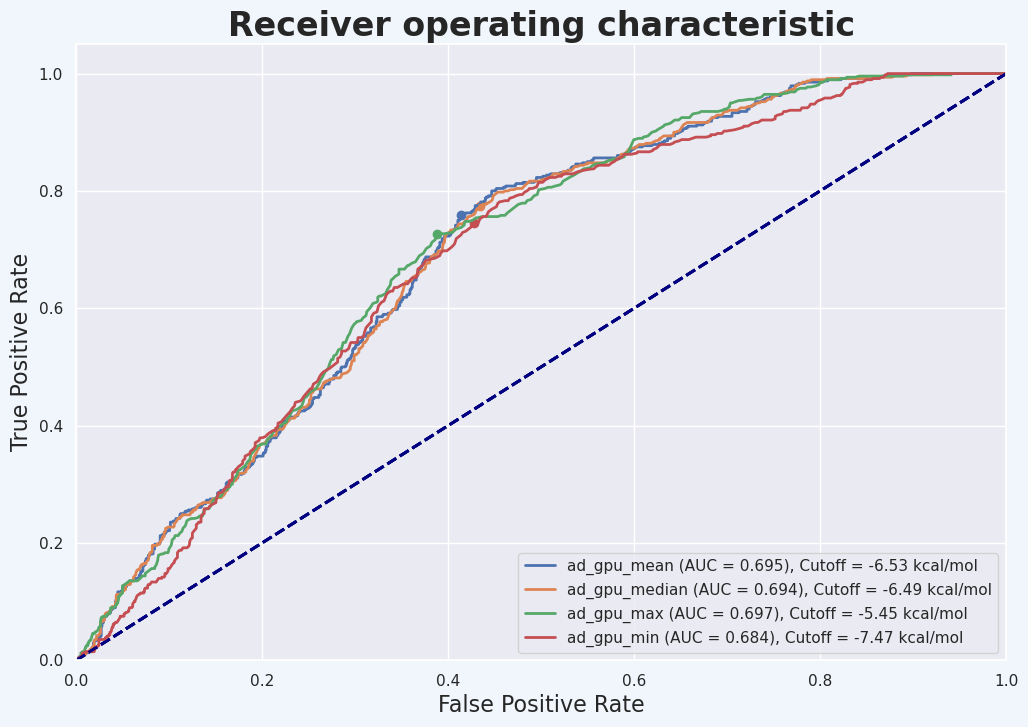

................
vina_gpu


,vina_gpu_mean,vina_gpu_median,vina_gpu_max,vina_gpu_min,Active
active_1,-8.92,-8.7,-8.5,-9.7,1
active_10,-9.28,-9.0,-8.9,-10.3,1


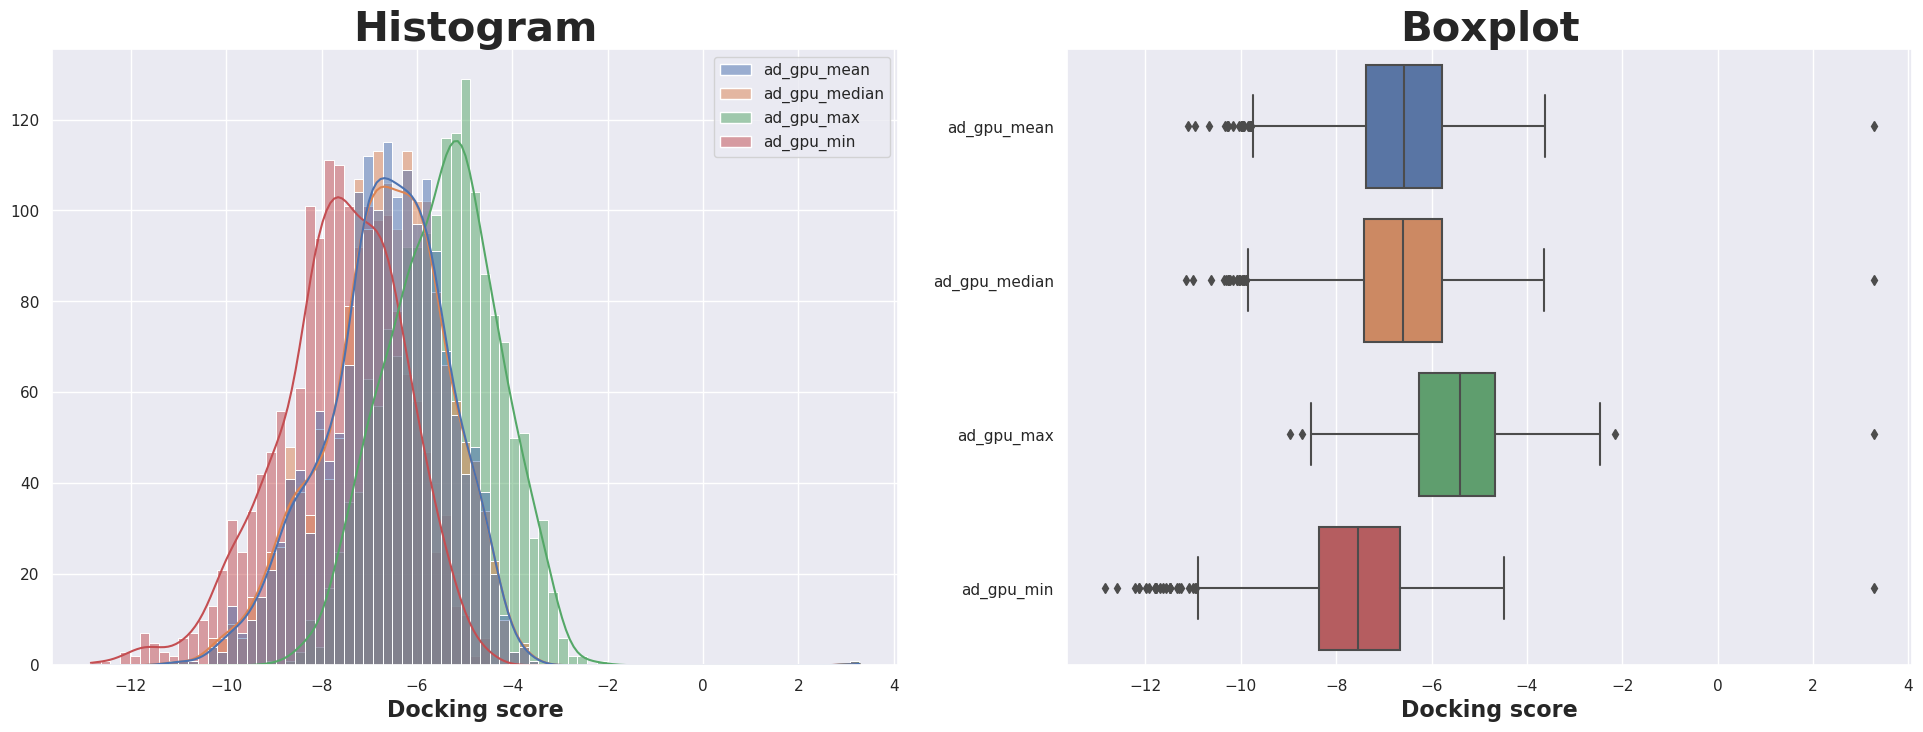

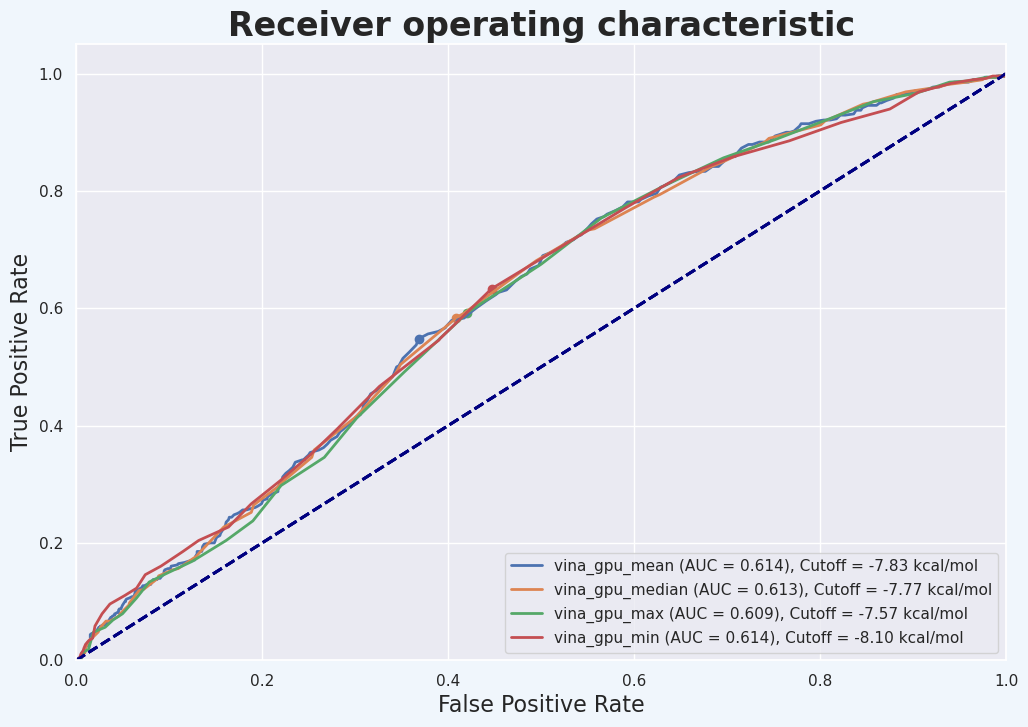

................
gnina_affinity


,gnina_affinity_mean,gnina_affinity_median,gnina_affinity_max,gnina_affinity_min,Active
active_1,-5.59,-5.52,-7.54,-4.01,1
active_10,-5.78,-5.73,-7.72,-3.32,1


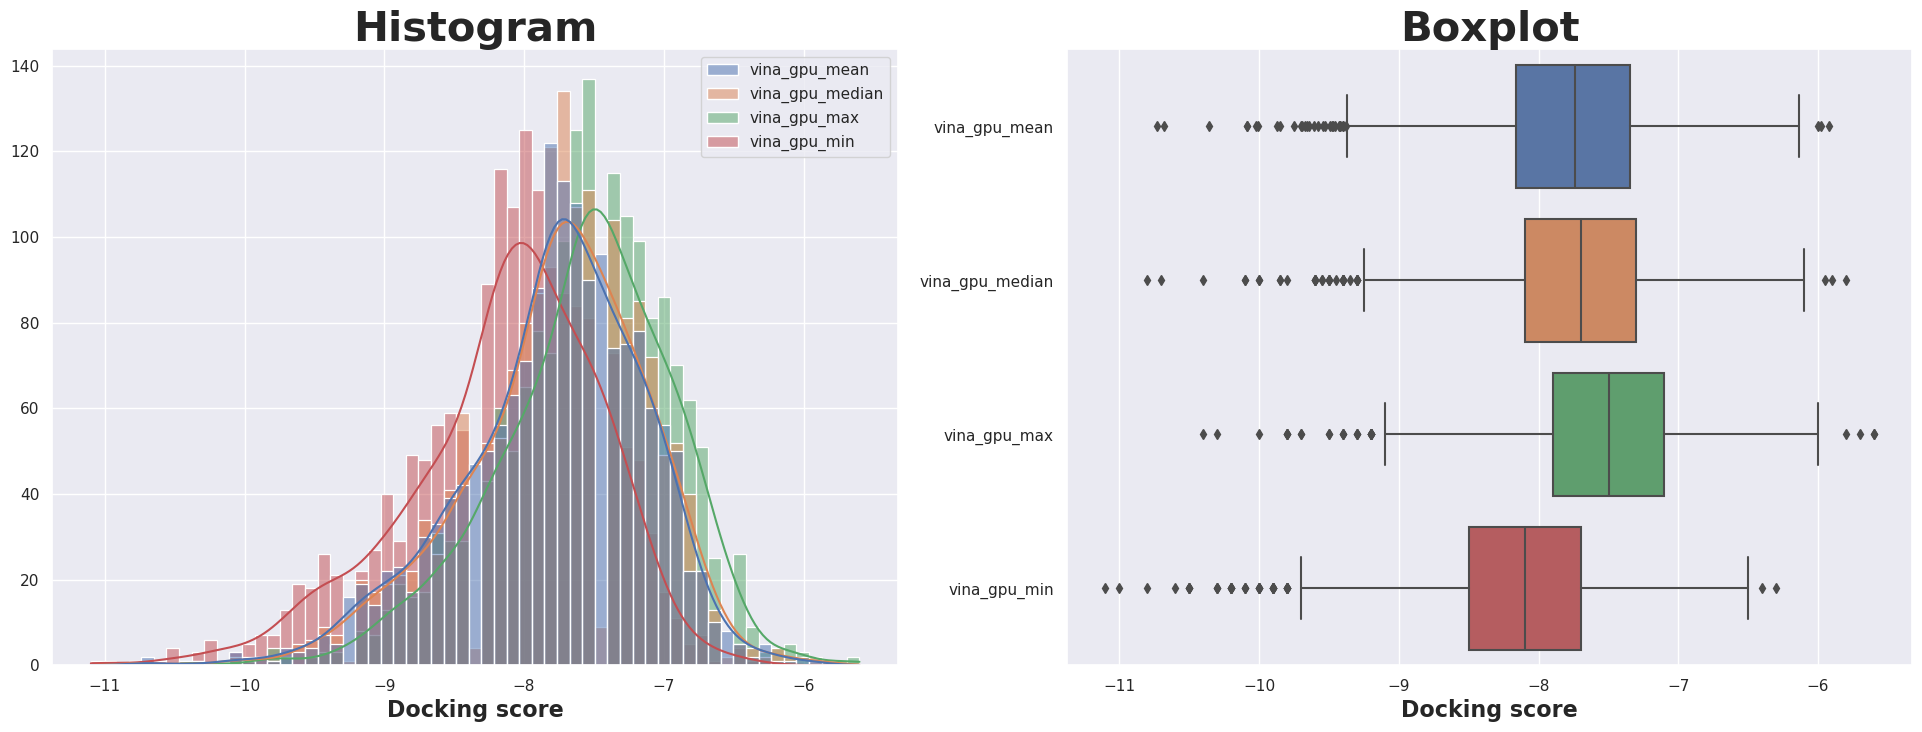

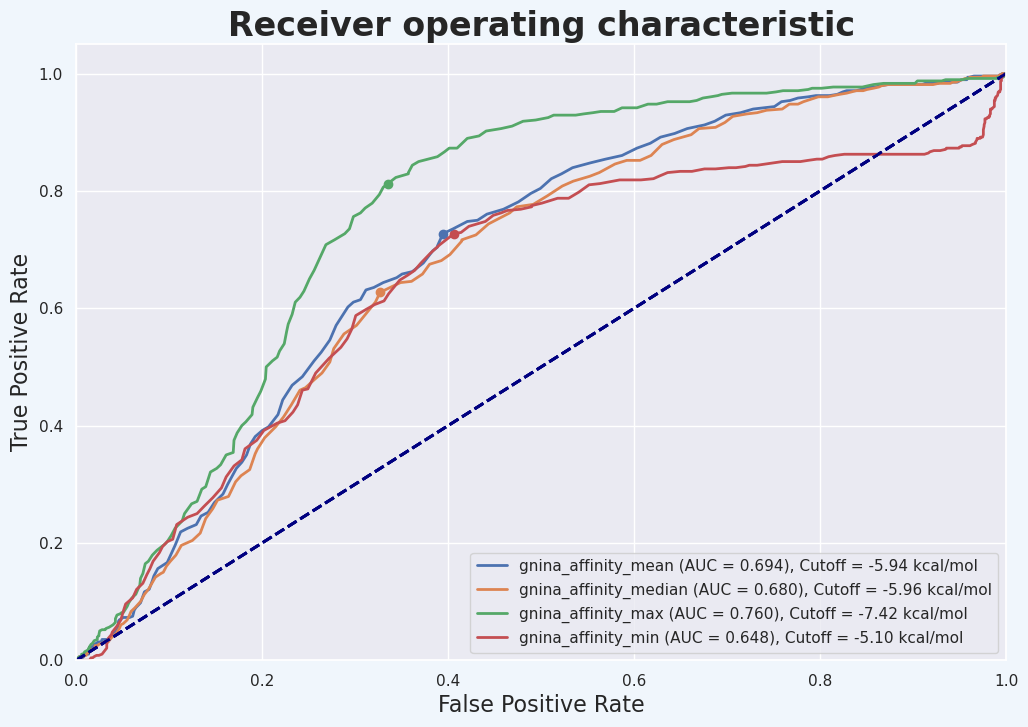

................
gnina_CNN_pose_score


,gnina_CNN_pose_score_mean,gnina_CNN_pose_score_median,gnina_CNN_pose_score_max,gnina_CNN_pose_score_min,Active
active_1,-0.30,-0.24,-0.89,-0.0,1
active_10,-0.26,-0.16,-0.86,-0.0,1


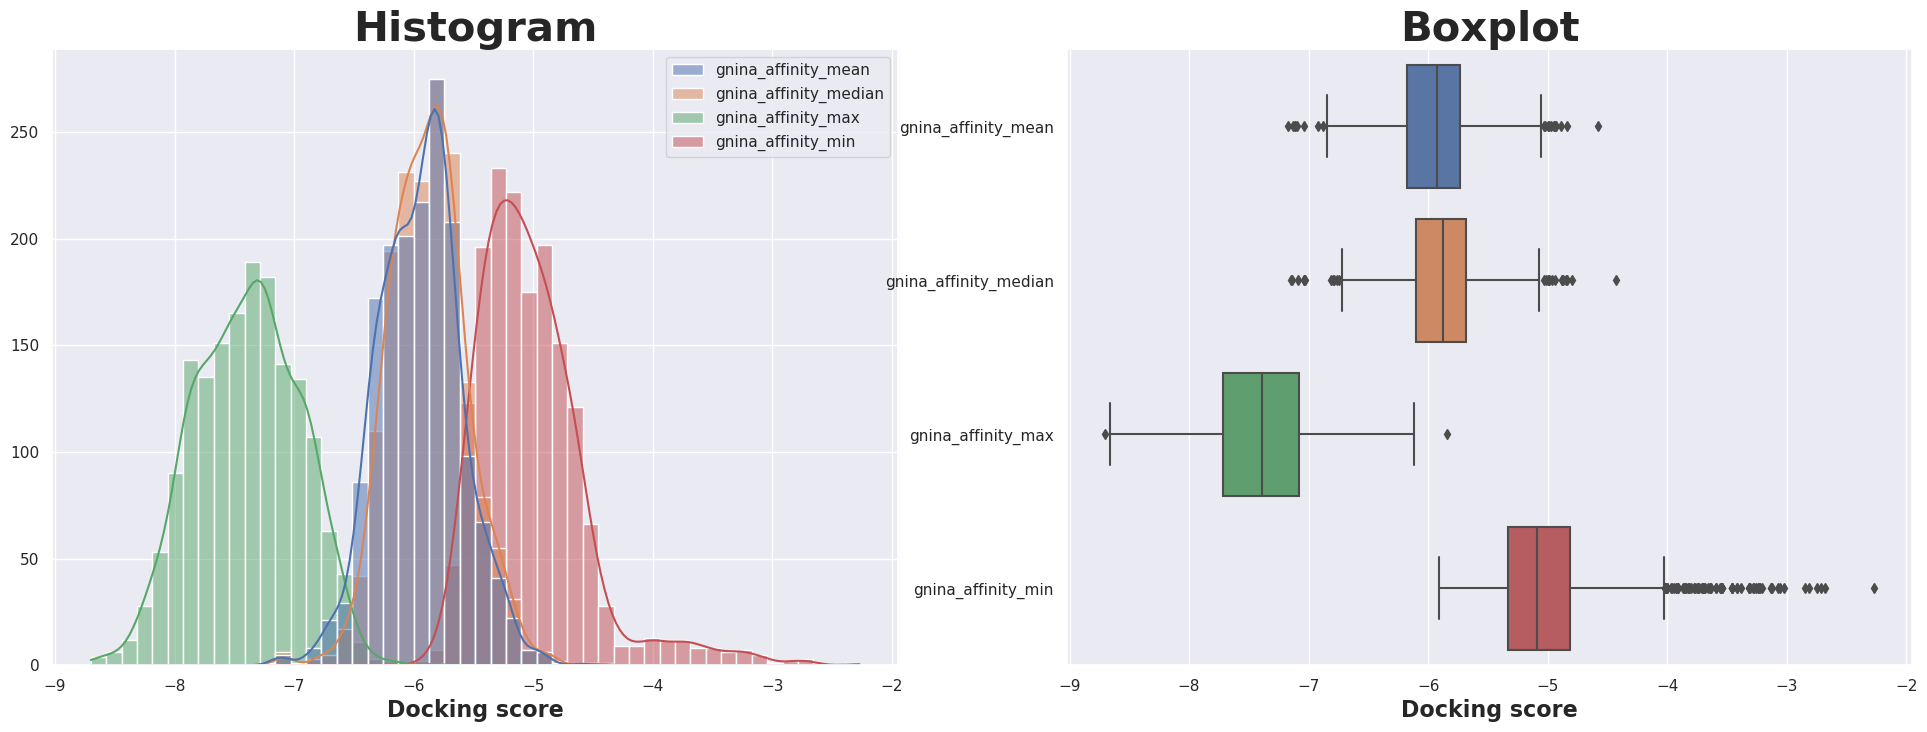

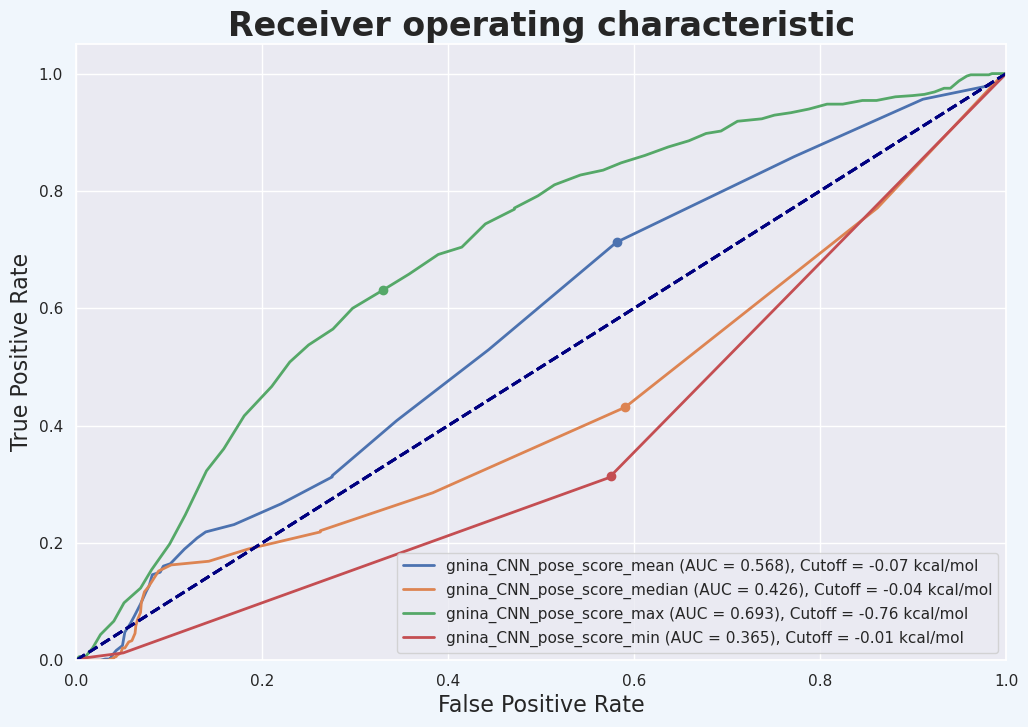

................


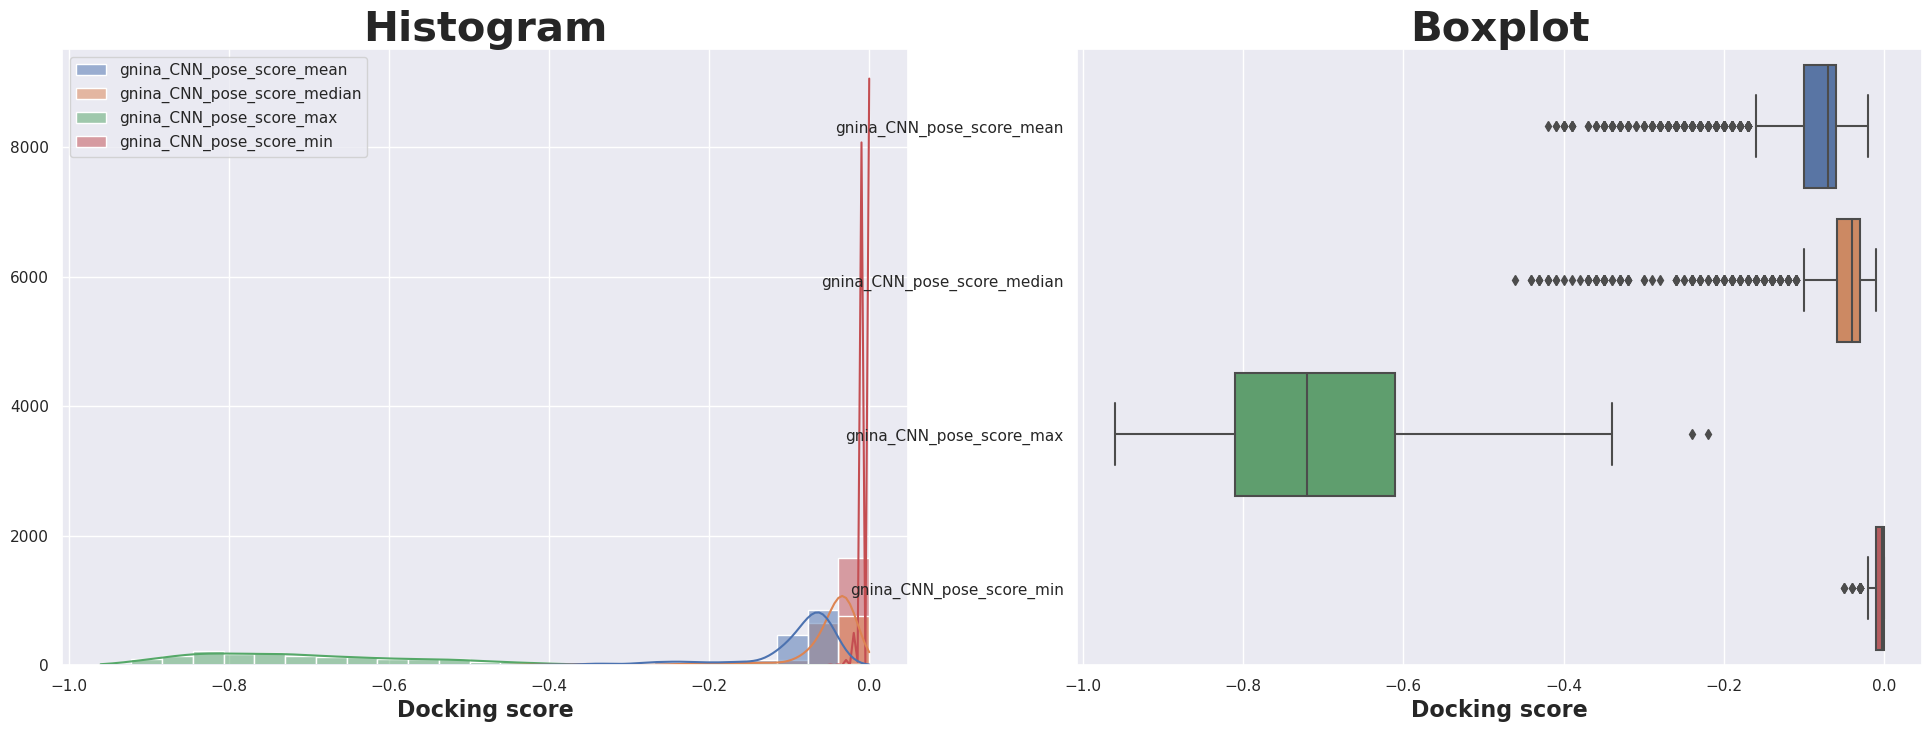

In [6]:
path = "./Data/Result"
soft_list = ['ad_gpu', 'vina_gpu', 'gnina_affinity', 'gnina_CNN_pose_score']
for i in soft_list:
    print(i)
    df = pd.read_csv(path+f'/{i}.csv', index_col=0)
    display(df.head(2))
    inter = internal_valid(df.dropna(), active_col='Active',name = i , rescore_method= 'minmax', figsize = (12,8), savefig=True, verbose = None)
    inter.fit() 
    print('................')

## 2. External

In [9]:
import os
import glob
import pandas as pd
import numpy as np
import sys
sys.path.append('DockValid')
from crawl_score import crawl_score
from validation_process import validation_process
from internal_valid import internal_valid
from validation_compare import validation_compare

In [14]:
ad_gpu = pd.read_csv('./Data/Result/ad_gpu.csv', index_col=0)
vina_gpu = pd.read_csv('./Data/Result/vina_gpu.csv', index_col=0)
gnina_1 = pd.read_csv('./Data/Result/gnina_affinity.csv', index_col=0)
gnina_2 = pd.read_csv('./Data/Result/gnina_CNN_pose_score.csv', index_col=0)

In [19]:
gnina_1['gnina_affinity_max']

active_1      -7.54
active_10     -7.72
active_100    -7.44
active_1000   -6.80
active_1001   -6.73
               ... 
active_995    -6.85
active_996    -6.63
active_997    -6.66
active_998    -6.90
active_999    -6.61
Name: gnina_affinity_max, Length: 1664, dtype: float64

In [21]:
gnina_2.columns

Index(['gnina_CNN_pose_score_mean', 'gnina_CNN_pose_score_median',
       'gnina_CNN_pose_score_max', 'gnina_CNN_pose_score_min', 'Active'],
      dtype='object')

In [22]:
gnina_2['gnina_CNN_pose_score_max']

active_1      -0.89
active_10     -0.86
active_100    -0.74
active_1000   -0.47
active_1001   -0.48
               ... 
active_995    -0.43
active_996    -0.51
active_997    -0.53
active_998    -0.45
active_999    -0.57
Name: gnina_CNN_pose_score_max, Length: 1664, dtype: float64

In [16]:
vina_gpu['vina_gpu_min']

active_1       -9.7
active_10     -10.3
active_100     -8.5
active_1000    -8.1
active_1001    -8.2
               ... 
active_995     -7.7
active_996     -6.9
active_997     -8.2
active_998     -8.0
active_999     -8.5
Name: vina_gpu_min, Length: 1664, dtype: float64

In [32]:
data_all = -pd.concat([ad_gpu['ad_gpu_min'],vina_gpu['vina_gpu_min'],gnina_1['gnina_affinity_max'],gnina_2['gnina_CNN_pose_score_max'],],axis=1)
data_all = pd.concat([ad_gpu['Active'],data_all, ], axis=1)
data_all

,Active,ad_gpu_min,vina_gpu_min,gnina_affinity_max,gnina_CNN_pose_score_max
active_1000,0,7.63,8.1,6.80,0.47
active_1001,0,6.44,8.2,6.73,0.48
active_1002,0,7.04,8.5,6.44,0.40
active_1003,0,5.73,8.0,6.84,0.38
active_1004,0,5.64,7.4,6.55,0.48
...,...,...,...,...,...
active_997,0,7.07,8.2,6.66,0.53
active_998,0,7.78,8.0,6.90,0.45
active_999,0,7.25,8.5,6.61,0.57
active_99,1,7.78,7.3,7.96,0.86


In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score,  roc_curve, auc
def plot_roc(data, active_col, score_type, verbose = None):
        """ Calculates and plots and ROC and AUC.
        Parameters:
        actives_list - binary array of active/decoy status.
        score_list - array of experimental scores.
        tool- a string name of the tool used.
        receptor - a string name of the protein used.
        """
        fpr, tpr, thresholds = roc_curve(data[active_col], data[score_type])
        roc_auc = round(auc(fpr, tpr),3)
        gmeans = np.sqrt(tpr * (1-fpr))
        # locate the index of the largest g-mean
        ix = np.argmax(gmeans)
        #cutoff = -self.scl.inverse_transform(self.thresholds[ix].reshape(-1, 1))
        if verbose != None:
            print('Best Threshold=%f,tpr=%.3f,fpr=%.3f, G-mean=%.3f' % (thresholds[ix],
                                                              tpr[ix],
                                                              fpr[ix],
                                                              gmeans[ix]))
            print('Cutoff=%.3f kcal/mol' % cutoff)
        lw = 2
        
        plt.plot(fpr, tpr, 
                 lw=lw, label=f'{score_type} (AUC = %0.3f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        #plt.scatter(fpr[ix], tpr[ix], marker='o')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize = 16)
        plt.ylabel('True Positive Rate', fontsize = 16)
        plt.title('Enrichment analysis', fontsize = 24, weight = 'semibold')
        plt.legend(loc="lower right")
        
from sklearn.metrics import confusion_matrix, recall_score, precision_score,  roc_curve, auc
def plot_precision_recall(data, active_col, score_type, verbose = None):
        """ Calculates and plots and ROC and AUC.
        Parameters:
        actives_list - binary array of active/decoy status.
        score_list - array of experimental scores.
        tool- a string name of the tool used.
        receptor - a string name of the protein used.
        """
        precision, recall, threshold = precision_recall_curve(data[active_col], data[score_type])
        ap = round(average_precision_score(data[active_col], data[score_type]),3)
        #f1 = round(f1_score(fpr, tpr),3)
        #gmeans = np.sqrt(tpr * (1-fpr))
        # locate the index of the largest g-mean
        #ix = np.argmax(gmeans)
        #cutoff = -self.scl.inverse_transform(self.thresholds[ix].reshape(-1, 1))
      
        
        lw = 2
        plt.plot(recall, precision, 
                 lw=lw, label=f'{score_type} (AP = %0.3f)' % (ap))
        plt.plot([0, 0], [0, 0], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall', fontsize = 16, weight = 'semibold')
        plt.ylabel('Precision', fontsize = 16, weight = 'semibold')
        plt.title('Precision Recall Curve', fontsize = 24, weight = 'semibold')
        plt.legend(loc="lower right")

In [101]:
data_all

,Active,ad_gpu_min,vina_gpu_min,gnina_affinity_max,gnina_CNN_pose_score_max
active_1000,0,7.63,8.1,6.80,0.47
active_1001,0,6.44,8.2,6.73,0.48
active_1002,0,7.04,8.5,6.44,0.40
active_1003,0,5.73,8.0,6.84,0.38
active_1004,0,5.64,7.4,6.55,0.48
...,...,...,...,...,...
active_997,0,7.07,8.2,6.66,0.53
active_998,0,7.78,8.0,6.90,0.45
active_999,0,7.25,8.5,6.61,0.57
active_99,1,7.78,7.3,7.96,0.86


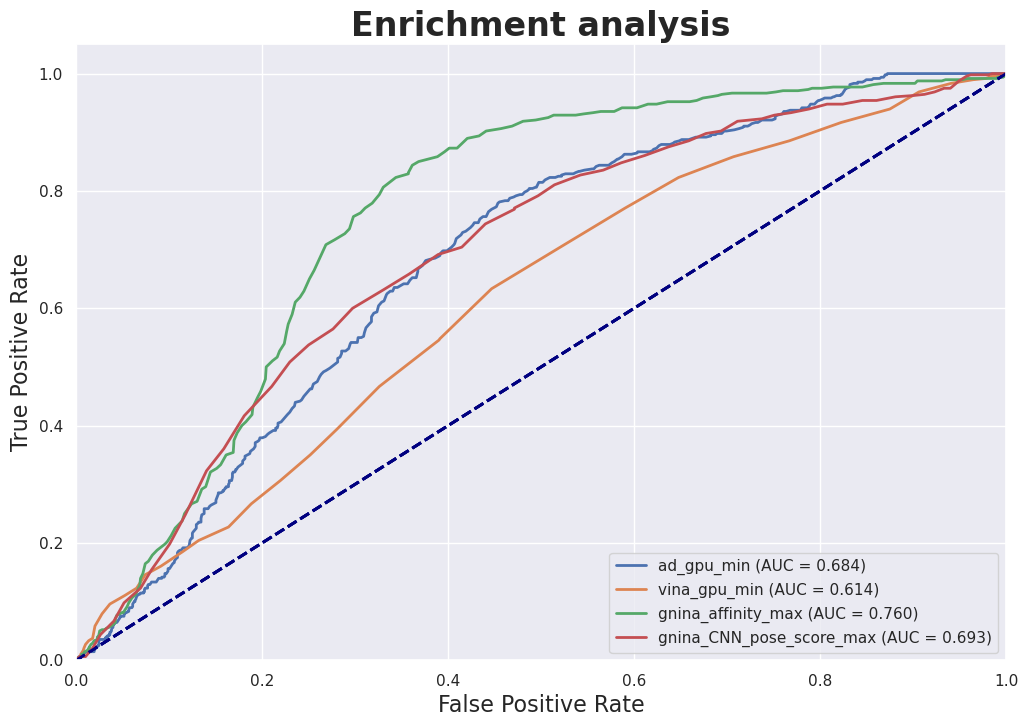

In [102]:
plt.figure(figsize =(12,8))
for i in data_all.columns[1:]:
    plot_roc(data_all, 'Active', i)

# Ensemble

In [98]:
df = data_all.copy()
col = df.columns

In [48]:
from sklearn.model_selection import train_test_split
X = df.drop('Active',axis = 1)
y = df["Active"]
#Split Data train, Data_test, Data_validation


df_dock_train, df_dock_test = train_test_split(df, test_size = 0.2,
                                                                random_state =42, stratify=df["Active"])


#df_dock_train.drop(['Canomicalsmiles'], axis =1, inplace = True)
df_dock_train.reset_index(inplace = True, drop = True)

#df_dock_test.drop(['Canomicalsmiles'], axis =1, inplace = True)
df_dock_test.reset_index(inplace = True, drop = True)

In [95]:
df_dock_test.columns.values[1:]

array(['ad_gpu_min', 'vina_gpu_min', 'gnina_affinity_max',
       'gnina_CNN_pose_score_max'], dtype=object)

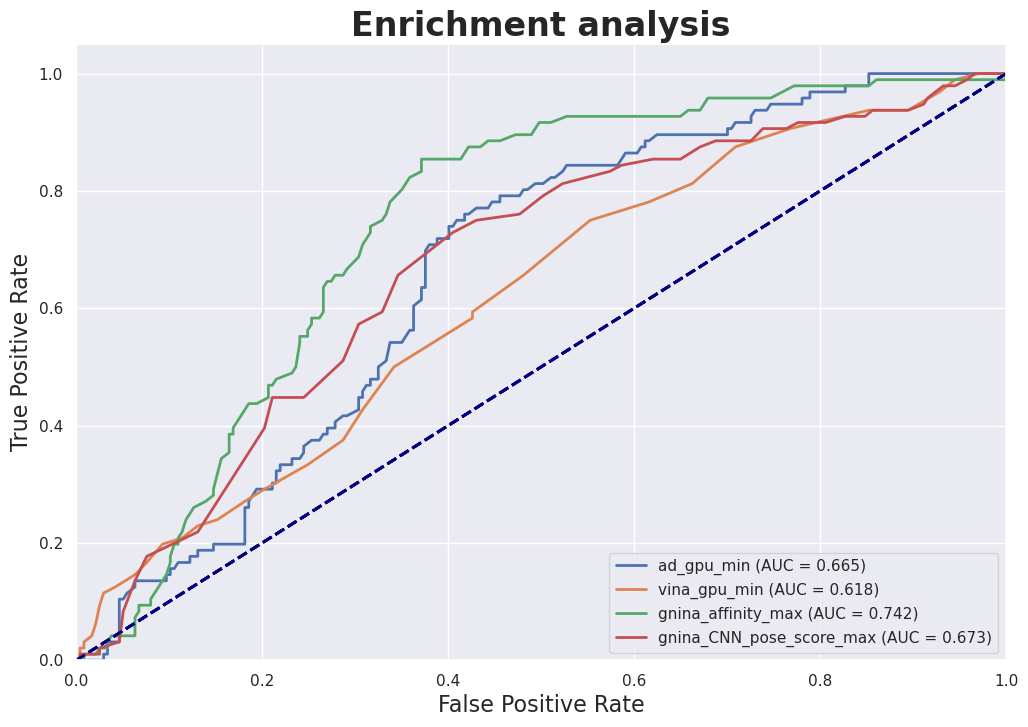

In [103]:
plt.figure(figsize =(12,8))
for i in col[1:]:
    plot_roc(df_dock_test, 'Active', i)

In [78]:
X_train = df_dock_train.drop(['Active'], axis =1)
y_train = df_dock_train['Active']

X_test = df_dock_test.drop(['Active'], axis =1)
y_test = df_dock_test['Active']

In [79]:
# Create directory for raw result
import pandas as pd
import os
SAVE_PREFIX = os.getcwd()+"/utility/"

if os.path.isdir(SAVE_PREFIX) == False:
    os.mkdir(SAVE_PREFIX)
else:
    pass

In [80]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score
scl = MinMaxScaler()
#scl = RobustScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)



model = XGBClassifier(random_state = 42, verbosity=0)
sampling = SMOTE(random_state=42)
steps = [('s', sampling),('m', model)]
pipeline = Pipeline(steps = steps)
pipeline.fit(X_train,y_train)
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores_f1 = cross_val_score(pipeline, X_train, y_train, scoring = "f1", cv=cv, n_jobs = -1)
scores_ap=cross_val_score(pipeline, X_train, y_train, scoring = "average_precision",
                        cv= cv, n_jobs = -1)
scores_auc=cross_val_score(pipeline, X_train, y_train, scoring = "roc_auc",
                        cv= cv, n_jobs = -1)
scores_recall = cross_val_score(pipeline, X_train, y_train, scoring = "recall", cv=cv, n_jobs = -1)
f1 = scores_f1.mean()
ap = scores_ap.mean()
auc = scores_auc.mean()
recall = scores_recall.mean()                                
                            
print("f1 cross validation", f1)
print("ap validation", ap)
print("auc validation", auc)
print("recall validation", recall)
print(classification_report(y_test, pipeline.predict(X_test)))
print('AUC =', roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1]))
print('AP =', average_precision_score(y_test, pipeline.predict_proba(X_test)[:,1]))

f1 cross validation 0.5967959317782658
ap validation 0.6167813794699624
auc validation 0.8074900397402903
recall validation 0.6297345928924878
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       237
           1       0.57      0.62      0.60        96

    accuracy                           0.76       333
   macro avg       0.71      0.72      0.71       333
weighted avg       0.76      0.76      0.76       333

AUC = 0.7899964838255977
AP = 0.6044739738468865


In [81]:
import pickle
while True:
    try:
        with open(SAVE_PREFIX + 'rescale.pkl','wb') as f:
            pickle.dump(scl,f)
        break
    except:
        print("No rescale")
        break

# Optimize

In [63]:
%%capture
import optuna
from optuna.trial import TrialState
from optuna.samplers import TPESampler
from IPython.display import clear_output
optuna.__version__
def objective(trial):
    
    ratio = trial.suggest_float("sampling_strategy", 0.5,1)
    sampling = SMOTE(random_state=42,sampling_strategy =ratio)
    m_depth = trial.suggest_int('max_depth', 1, 10)
    child_weight = trial.suggest_int('min_child_weight', 1, 10)
    lr =  trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    estimators = trial.suggest_int('n_estimators', 10, 100)
    gamaa = trial.suggest_loguniform('gamma', 1e-8, 1.0)
    reg_alha = trial.suggest_loguniform('reg_alpha', 1e-8, 1.0)
    lamb = trial.suggest_loguniform('reg_lambda', 1e-8, 1.0)
    sub = trial.suggest_loguniform('subsample', 0.01, 1.0)
    colsample = trial.suggest_loguniform('colsample_bytree', 0.01, 1.0)
    model = XGBClassifier(random_state = 42, verbosity=0, use_label_encoder=False, eval_metrics ='mlogloss',
                     max_depth = m_depth, learning_rate = lr, n_estimators = estimators,min_child_weight=child_weight,
                         gama = gamaa, subsample = sub,colsample_bytree= colsample,reg_alpha=reg_alha,reg_lambda =lamb)
    steps = [('s', sampling),('m', model)]
    pipeline = Pipeline(steps = steps)
    
    #bm.fit(X_train, y_train, verbose=0)
    cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores_f1 = cross_val_score(pipeline, X_train, y_train, scoring = "roc_auc", cv=cv, n_jobs = -1)
    #scores_ap = cross_val_score(gbm, X_train, y_train, scoring = "average_precision", cv=cv, n_jobs = -1)
    f1 = scores_f1.mean()
    return f1


if __name__ == "__main__":
    sampler = TPESampler(seed = 42)
    study = optuna.create_study(direction='maximize',sampler=sampler)
    study.optimize(objective, n_trials=400)
    clear_output(wait=True)
    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
    
    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")

    trials = study.best_trial

    print("  Value: ", trials.value)

    print("  Params: ")
    for key, value in trials.params.items():
        print("    {}: {}".format(key, value))   

[I 2023-07-19 10:51:08,080] A new study created in memory with name: no-name-799f9103-afd3-45e1-ac99-af4b65a3de60
[I 2023-07-19 10:51:09,854] Trial 0 finished with value: 0.7981325111239063 and parameters: {'sampling_strategy': 0.6872700594236812, 'max_depth': 10, 'min_child_weight': 8, 'learning_rate': 0.15751320499779725, 'n_estimators': 24, 'gamma': 1.7699302940633311e-07, 'reg_alpha': 2.9152036385288193e-08, 'reg_lambda': 0.08499808989182997, 'subsample': 0.15930522616241014, 'colsample_bytree': 0.2607024758370766}. Best is trial 0 with value: 0.7981325111239063.
[I 2023-07-19 10:51:09,918] Trial 1 finished with value: 0.7743850430624757 and parameters: {'sampling_strategy': 0.5102922471479012, 'max_depth': 10, 'min_child_weight': 9, 'learning_rate': 0.0265875439832727, 'n_estimators': 26, 'gamma': 2.9324868872723725e-07, 'reg_alpha': 2.716051144654844e-06, 'reg_lambda': 0.00015777981883364995, 'subsample': 0.0730953983591291, 'colsample_bytree': 0.038234752246751866}. Best is tria

In [64]:
print("Best trial:")

trials = study.best_trial

print("  Value: ", trials.value)

print("  Params: ")
for key, value in trials.params.items():
    print("    {}: {}".format(key, value))   

Best trial:
  Value:  0.8320747111411342
  Params: 
    sampling_strategy: 0.7036459004082385
    max_depth: 4
    min_child_weight: 1
    learning_rate: 0.039960378065945254
    n_estimators: 83
    gamma: 0.0001108219830030641
    reg_alpha: 8.073695482968753e-08
    reg_lambda: 1.2956867115624262e-05
    subsample: 0.6460846613262637
    colsample_bytree: 0.7975225426111655


# Check

In [82]:
model = XGBClassifier(random_state = 42, verbosity=0, eval_metrics ='mlogloss',
                     max_depth = 4, learning_rate = 0.039960378065945254, n_estimators = 83,
                      min_child_weight = 1, gama = 0.0001108219830030641, subsample = 0.6460846613262637,
                      colsample_bytree = 0.7975225426111655,
                      reg_alpha = 8.073695482968753e-08,
                      reg_lambda = 1.2956867115624262e-05
                     )
sampling = SMOTE(random_state=42,sampling_strategy =0.7036459004082385)
steps = [('s', sampling),('m', model)]
pipeline = Pipeline(steps = steps)
pipeline.fit(X_train,y_train)
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores_f1 = cross_val_score(pipeline, X_train, y_train, scoring = "f1", cv=cv, n_jobs = -1)
scores_ap=cross_val_score(pipeline, X_train, y_train, scoring = "average_precision",
                        cv= cv, n_jobs = -1)
scores_auc=cross_val_score(pipeline, X_train, y_train, scoring = "roc_auc",
                        cv= cv, n_jobs = -1)
scores_recall = cross_val_score(pipeline, X_train, y_train, scoring = "recall", cv=cv, n_jobs = -1)
f1 = scores_f1.mean()
ap = scores_ap.mean()
auc = scores_auc.mean()
recall = scores_recall.mean()                                
                            
print("f1 cross validation", f1)
print("ap validation", ap)
print("auc validation", auc)
print("recall validation", recall)
print(classification_report(y_test, pipeline.predict(X_test)))
print('AUC =', roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1]))
print('AP =', average_precision_score(y_test, pipeline.predict_proba(X_test)[:,1]))

f1 cross validation 0.6347202411364528
ap validation 0.6568260007125736
auc validation 0.8320747111411342
recall validation 0.7168241115609536
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       237
           1       0.56      0.78      0.65        96

    accuracy                           0.76       333
   macro avg       0.72      0.76      0.73       333
weighted avg       0.80      0.76      0.77       333

AUC = 0.8178621659634319
AP = 0.6178264519934805


In [85]:
# save model for prediction
import pickle
with open(SAVE_PREFIX + 'model.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [86]:
y_pred = pipeline.predict_proba(X_test)[:,1]
pred_df = pd.DataFrame(y_pred)
pred_df.columns = ['ensemble']
pred_df.sort_values(by='ensemble', ascending = False)

,ensemble
133,0.895336
184,0.862775
305,0.858042
96,0.851669
249,0.850708
...,...
149,0.026642
98,0.026400
126,0.026323
319,0.026147


In [87]:
test_2 = pd.concat([df_dock_test, pred_df], axis =1)
test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active                    333 non-null    int64  
 1   ad_gpu_min                333 non-null    float64
 2   vina_gpu_min              333 non-null    float64
 3   gnina_affinity_max        333 non-null    float64
 4   gnina_CNN_pose_score_max  333 non-null    float64
 5   ensemble                  333 non-null    float32
dtypes: float32(1), float64(4), int64(1)
memory usage: 14.4 KB


ad_gpu_min
vina_gpu_min
gnina_affinity_max
gnina_CNN_pose_score_max
ensemble


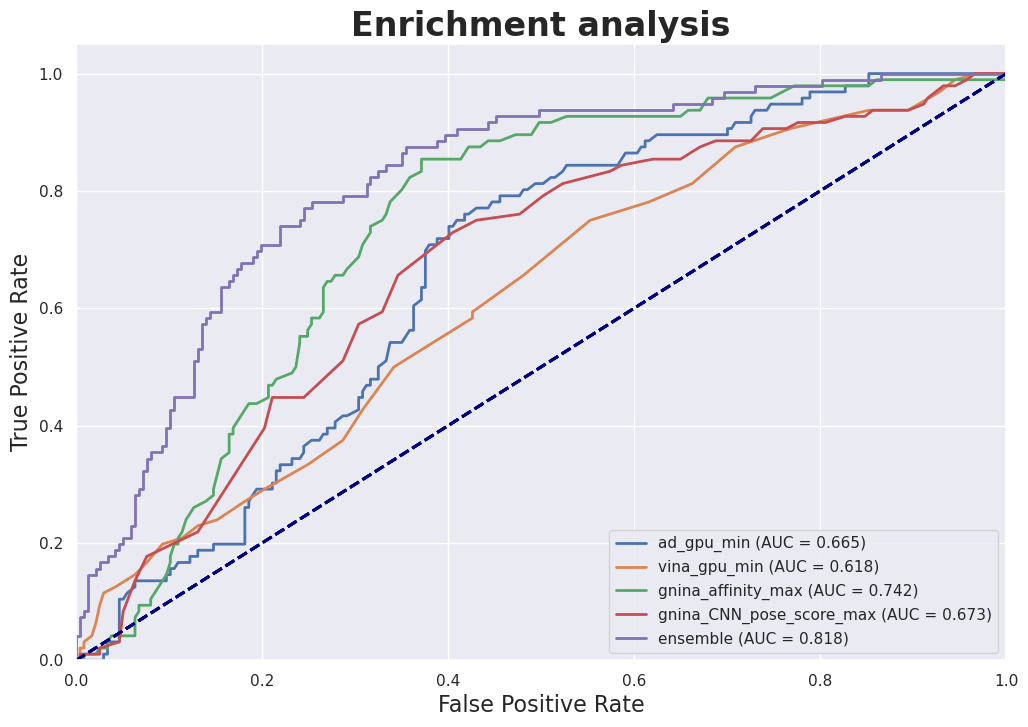

In [106]:
import seaborn as sns
sns.set()
plt.figure(figsize =(12,8))
for i in test_2.columns[1:]:
    print(i)
    plot_roc(test_2, 'Active', i)